In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [0]:
treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [0]:
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [0]:
treino.drop(columns=['Unnamed: 0'], inplace=True)

In [0]:
y_train = treino['NU_NOTA_MT']

In [0]:
treino.fillna(0,axis=0, inplace=True)

In [0]:
correlacao = treino.corrwith(treino['NU_NOTA_MT'], axis=0)
list(correlacao)

[nan,
 0.003069856408588072,
 0.00261274433816038,
 -0.2408744489205487,
 -0.14128416930166712,
 -0.07023890287343569,
 -0.03313026749470923,
 0.03797792759929956,
 0.03755427671266594,
 0.02373627801505224,
 -0.19155341353979508,
 0.18908423438105668,
 0.08348222730435441,
 0.07880395274707881,
 0.1550025338913636,
 0.155119495616012,
 0.1549900248145521,
 0.18566266359452538,
 0.1471363545656277,
 0.15212861980064915,
 -0.006546184928106472,
 nan,
 -0.002616708588557917,
 0.006941891981052125,
 nan,
 -0.019528153238435552,
 0.0027748151607285593,
 0.03383830708802208,
 0.0052589416059830064,
 0.00839176384209454,
 nan,
 0.006973850764603813,
 -0.010649999710190441,
 -0.0024573944005586014,
 -0.02812915617836737,
 -0.03276218722106024,
 -0.009061325952461528,
 nan,
 -0.006772010789470013,
 nan,
 -0.006367994815880646,
 0.004556806248503572,
 -0.007688980111553195,
 -0.031036095844098572,
 -0.005165979045701247,
 -0.0018876707539817676,
 -0.005942944278011381,
 -0.0047700645853214615,


In [0]:
correlacao.shape

(106,)

In [0]:
treino.drop(['NU_ANO'], axis=1, inplace= True)

In [0]:
import seaborn as sns

Text(0.5, 1.08, 'Dispersão entre variáveis')

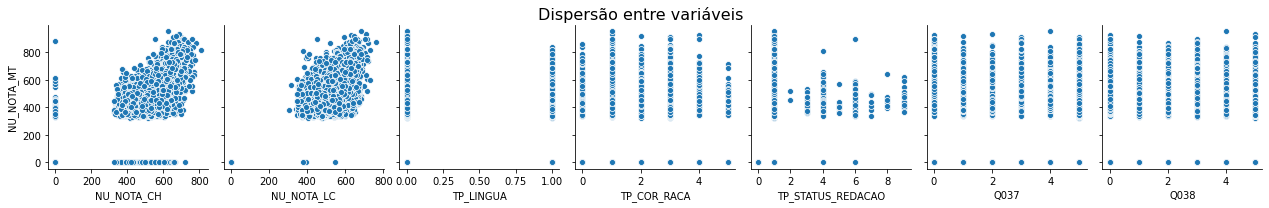

In [0]:
ax = sns.pairplot(treino, y_vars='NU_NOTA_MT', x_vars=['NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_COR_RACA',
                                                       'TP_STATUS_REDACAO', 'Q037', 'Q038'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)

Text(0.5, 1.08, 'Dispersão entre variáveis')

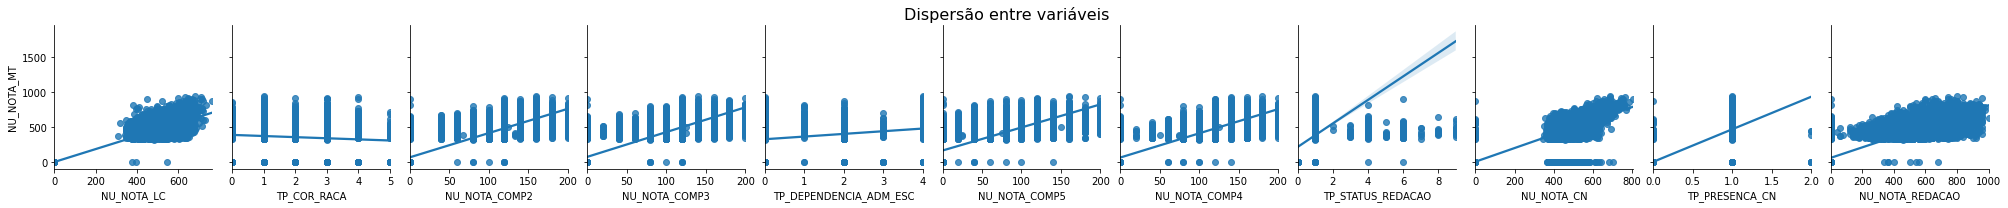

In [0]:
ax = sns.pairplot(treino, y_vars='NU_NOTA_MT', x_vars=['NU_NOTA_LC', 'TP_COR_RACA','NU_NOTA_COMP2','NU_NOTA_COMP3',
                                                       'TP_DEPENDENCIA_ADM_ESC','NU_NOTA_COMP5','NU_NOTA_COMP4',
                                                       'TP_STATUS_REDACAO', 'NU_NOTA_CN', 'TP_PRESENCA_CN',
                                                       'NU_NOTA_REDACAO'], kind = 'reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [0]:
y_train.shape

(13730,)

In [0]:
treino_1 = treino[['NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP1',
                   'TP_DEPENDENCIA_ADM_ESC','NU_NOTA_COMP5','NU_NOTA_COMP4',
                    'TP_PRESENCA_CN','NU_NOTA_MT']]
treino_1

,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP1,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP5,NU_NOTA_COMP4,TP_PRESENCA_CN,NU_NOTA_MT
0,120.0,120.0,120.0,0.0,80.0,80.0,1,399.4
1,120.0,120.0,140.0,2.0,80.0,120.0,1,459.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
13725,120.0,80.0,120.0,0.0,40.0,80.0,1,403.2
13726,120.0,120.0,120.0,0.0,80.0,120.0,1,452.4
13727,120.0,120.0,120.0,0.0,120.0,120.0,1,398.0
13728,100.0,80.0,100.0,0.0,100.0,80.0,1,386.6


In [0]:
treino_1.shape

(13730, 8)

In [0]:
X = treino_1[['NU_NOTA_COMP2','NU_NOTA_COMP3','TP_DEPENDENCIA_ADM_ESC','NU_NOTA_COMP5','NU_NOTA_COMP4',
              'TP_PRESENCA_CN','NU_NOTA_COMP1']]

In [0]:
y = treino_1[['NU_NOTA_MT']]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 420)#random_state = bloco de treino e teste ideticos

In [0]:
modelo = LinearRegression()

In [0]:
modelo1 = RandomForestRegressor()

In [0]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
modelo1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.84


In [0]:
print('R² = {}'.format(modelo1.score(X_train, y_train).round(2)))

R² = 0.89


In [0]:
y_pred = modelo.predict(X_test)

In [0]:
y_pred1 = modelo1.predict(X_test)

In [0]:
print('R² = %s' % metrics.r2_score(y_test, y_pred).round(2))

R² = 0.84


In [0]:
print('R² = %s' % metrics.r2_score(y_test, y_pred1).round(2))

R² = 0.84


In [0]:
list(y_pred1)

[0.9852139625001921,
 564.7307928959927,
 490.1146737734487,
 499.75468865704295,
 593.316521428572,
 389.3163333333334,
 561.8102163211961,
 0.216214818470048,
 0.216214818470048,
 723.4393333333333,
 525.8649502669111,
 0.216214818470048,
 0.216214818470048,
 0.9852139625001921,
 525.6360589298773,
 487.68517329541805,
 473.6846795024418,
 202.94588001646179,
 565.2476928571429,
 438.3544035714286,
 552.7178761904764,
 0.9852139625001921,
 475.12656734174766,
 440.815013924964,
 466.10913571428546,
 0.216214818470048,
 499.75468865704295,
 485.8686130952387,
 202.94588001646179,
 492.6671392857139,
 440.2043963226916,
 471.0150166006222,
 400.53404761904756,
 434.61034307359347,
 202.94588001646179,
 459.6582246031748,
 385.814611904762,
 440.2043963226916,
 502.77581666666697,
 499.75468865704295,
 475.12656734174766,
 503.82988333333304,
 0.216214818470048,
 487.7764819829959,
 439.2084551280215,
 0.216214818470048,
 0.216214818470048,
 535.4520262626263,
 0.216214818470048,
 440.7

In [0]:
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [0]:
resposta_df = teste[['NU_NOTA_COMP2','NU_NOTA_COMP3','TP_DEPENDENCIA_ADM_ESC','NU_NOTA_COMP5','NU_NOTA_COMP4',
                     'TP_PRESENCA_CN','NU_NOTA_COMP1']]

In [0]:
resposta_df.fillna(value=0, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
y_pred2 = modelo1.predict(resposta_df)

In [0]:
list(y_pred2)

[453.02966331734564,
 487.7764819829959,
 484.7742499999999,
 0.216214818470048,
 497.0997644300141,
 491.3998727874569,
 565.2476928571429,
 430.32453095238094,
 476.3856785714288,
 470.114695998041,
 0.216214818470048,
 0.216214818470048,
 505.24811969696975,
 481.7623675962925,
 495.7804734126982,
 401.0663952380952,
 0.216214818470048,
 0.216214818470048,
 0.216214818470048,
 425.3269510521414,
 445.35410417166736,
 202.94588001646179,
 0.216214818470048,
 458.7636640748141,
 560.1497711412359,
 459.41118626792394,
 616.9794462121213,
 438.03311802086836,
 438.8889736064706,
 0.216214818470048,
 0.216214818470048,
 453.3508978569548,
 613.3429642857143,
 505.33873588057156,
 514.1494928571431,
 446.56764470806957,
 518.8701870533878,
 492.4691975760348,
 491.3998727874569,
 647.5520833333331,
 500.2670907546224,
 469.0941253968256,
 384.51138535353573,
 421.4104916666665,
 0.9852139625001921,
 389.0693100027423,
 484.386931243013,
 448.87050813700057,
 530.3688333333333,
 487.71975

In [0]:
df = pd.DataFrame(data = teste['NU_INSCRICAO'])

In [0]:
df

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934
...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef
4573,655fa6306720ff16e825903b5422a46608a77545
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293


In [0]:
d1 = pd.DataFrame(data=y_pred2, columns=['NU_NOTA_MT']).round(1)

In [0]:
d1

,NU_NOTA_MT
0,453.0
1,487.8
2,484.8
3,0.2
4,497.1
...,...
4571,466.5
4572,446.5
4573,490.1
4574,467.2


In [0]:
resposta = pd.concat([df,d1],axis=1)


In [0]:
resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,453.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,487.8
2,b38a03232f43b11c9d0788abaf060f7366053b6d,484.8
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.2
4,715494628a50142ce8cb17191cfe6d0f3cae0934,497.1
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,466.5
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,446.5
4573,655fa6306720ff16e825903b5422a46608a77545,490.1
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,467.2


In [0]:
resposta.to_csv('answer.csv', index = False)

In [0]:
answer = pd.read_csv('answer.csv')
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,453.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,487.8
2,b38a03232f43b11c9d0788abaf060f7366053b6d,484.8
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.2
4,715494628a50142ce8cb17191cfe6d0f3cae0934,497.1
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,466.5
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,446.5
4573,655fa6306720ff16e825903b5422a46608a77545,490.1
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,467.2
